# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
#import numpy and pandas
import os
import numpy as np
import pandas as pd
import this

os.listdir()

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


['main.ipynb', '.ipynb_checkpoints']

# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. Load the data using Ironhack's database (db: kickstarter, table: projects).

In [2]:
# Your code here:
# Your code here:
# establishing the path to the dataset
file = "../ks-projects-201801.csv" 

# create a DF from the dataset
kickstarter = pd.read_csv(file)

Now print the `head` function to examine the dataset.

In [3]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

In [13]:
# Your code here:
from scipy.stats import mode

#is this it?
modes = mode(kickstarter[["country", "currency"]])
                                   
modes

ModeResult(mode=array([['US', 'USD']], dtype=object), count=array([[292627, 295365]]))

The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [16]:
# Your code here:
from scipy.stats import tmean

# I think this is it:
goal_percentile75 = np.percentile(kickstarter["goal"], 0.75)
trimmed_mean = tmean(kickstarter.goal, (0, goal_percentile75))
trimmed_mean

23.951684361549493

#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, see:

* [Wikipedia's explanation](http://b.link/test61)
* [A cool deep explanation](http://b.link/handbook47)
* [An explanation with some important Fisher's considerations](http://b.link/significance76)

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [19]:
# Your code here:
# this?
kickstarter["goal_met"] = np.where(kickstarter["usd_pledged_real"] > 
                                   kickstarter["usd_goal_real"], 1, 0)

Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [21]:
# Your code here:
kickstarter["usd"] = np.where(kickstarter["currency"] == "USD", 1, 0)

Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [25]:
# Your code here:
from scipy.stats import fisher_exact

contigency_table = pd.crosstab(kickstarter["goal_met"], kickstarter["usd"])

odds_ratio, Pvalue = fisher_exact(contigency_table)

# What's the odds_ratio?
Pvalue

9.78e-321

# Challenge 2 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the `interp1d` function and first take a sample of 10 rows from `kickstarter`. 

In [37]:
# Your code here:

# from scipy.stats import interp1d this gives an error

# this also gives an error: from scipy.stats import interpolate

# this also gives an error: from scipy import interp1d

# this *seems* to work (but actually doesn't?) --> the method has a bug; see end of 
# challenge 2
from scipy.interpolate import interp1d

sample = kickstarter.sample(n = 10)

Next, create a linear interpolation of the backers as a function of `usd_pledged_real`. Create a function `f` that generates a linear interpolation of backers as predicted by the amount of real pledged dollars.

In [43]:
# Your code here:
# this?
f = interp1d(sample["usd_pledged_real"], sample["backers"])
f

Now create a new variable called `x_new`. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function. 

Hint: one option is the `np.arange` function.

In [59]:
# Your code here:
# I'm not understanding what is the goal, but I think this is what's been asked:
x_new = np.arange(sample["backers"].min(), sample["backers"].max())

len(x_new) # I'm confused; why 60? why is it 6 times bigger than the sample??
kickstarter.shape

# wait; so because the max value is 60, and the min value is 0, it created a "enumerate" of 
# all the values between 0 and 60, with 0 being included and 60 being excluded? 
# why is this step needed??
x_new 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

Plot function f for all values of `x_new`. Run the code below.

array([0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.01745636, 1.05624827, 1.09504018, 1.13383209, 1.172624  ,
       1.2114159 , 1.25020781, 1.28899972, 1.32779163, 1.36658354,
       1.40537545, 1.44416736, 1.48295927, 1.52175118, 1.56054309,
       1.599335  , 1.6381269 , 1.67691881, 1.71571072, 1.75450263,
       1.79329454, 1.83208645, 1.87087836, 1.90967027, 1.94846218,
       1.98725409, 2.026046  , 2.06483791, 2.10362981, 2.14242172,
       2.18121363, 2.22000554, 2.25879745, 2.29758936, 2.33638127,
       2.37517318, 2.41396509, 2.452757  , 2.49154891, 2.53034081,
       2.56913272, 2.60792463, 2.64671654, 2.68550845, 2.72430036])

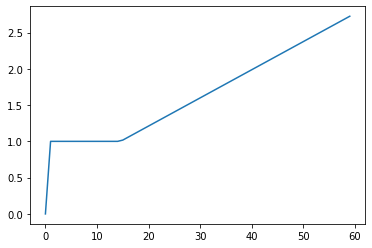

In [63]:
# Run this code:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new)) # so.. x is x_new (0 - 60, which in fact is 59) and y is a function
# that takes all the points betwen 0 and 59 (x_new) and..? What is f doing, and why is it 
# doing it the way it is doing it? I mean, I know (or more correctly, I think I know) that is 
# supposed to be connecting the each point given its coordinates, but what I am seeing is not 
# that; what I'm seeing is atributing a y coordinate value to each x point. What are these 
# values? Where are they comming from? And why did we need more points to connect anyway, if
# the idea of interpolation is to connect points with missing data between then? And why is 
# the first value "0.        ,", then the next 14 "1.        ,"? Why are there values (such as
# "2.026046  ,") that have a Rspace (or Rspaces)?
f(x_new)

Next create a function that will generate a cubic interpolation function. Name the function `g`.

In [120]:
# Your code here:
# this?
#g = interp1d(sorted(sample["usd_pledged_real"]), sample["backers"], kind = 'cubic', 
#             assume_sorted = True)

print(sample["usd_pledged_real"].value_counts()) # There are 2 0.00 values.

# So.. after spending a few hours with this, reading the documentation, reading about 
# interpolation, reading about monotonic functions, checking my collegues' work, and digging 
# deeper into the the library, I think (I'm not sure), I discovered a (known) bug in the 
# interp1d method, which is raising me an error when I try to do this, no matter what sintax I
# use to do it. 
# (See: 
# https://github.com/scipy/scipy/issues/9886 
# https://github.com/scipy/scipy/issues/9886 and 
# https://github.com/scipy/scipy/pull/11023 )

# Since in this exercise the data doesn't seem to actually matter, I'll make a change in my 
# sample that, if I got it right, I'm thinking it can solve the problem and allow me to finish
# it. Hope it's O.K.

# creating a copy of the sample so that the error can be reproduced
new_sample = sample.copy()

# checking that the values are identical
new_sample["usd_pledged_real"] == sample["usd_pledged_real"]

# trying the method with the new_sample: I get the same error (as expected)
#g = interp1d(new_sample["usd_pledged_real"], new_sample["backers"], kind = 'cubic') #, assume_sorted = True)

# changing one of the 0.00 values in the usd_pledged_real column:
new_sample.loc[51328, "usd_pledged_real"] = 2.00

# checking the change:
new_sample["usd_pledged_real"]

# trying the method again (expectation: it will work now) -> it did work now.
g = interp1d(new_sample["usd_pledged_real"], new_sample["backers"], kind = 'cubic') #, assume_sorted = True)

# O.K., so: 1) Apparently there's a (known) bug in this method; 2) That bug will not be 
# addressed; 3) Unless I did anything wrong in the exercise (quite possible), given the way
# the interp1d method works and the nature of the dataframe, when asking for a sample it 
# should be specified that the sample should contain only unique values (at least for the 
# "usd_pledged_real" column) in order to avoid this error. This Series has MANY non-unique
# values. What suprises me is that it hasn't happened before, which leads me to think that
# I more than probably did something wrong.

print("\nvalue counts\n", kickstarter["usd_pledged_real"].value_counts())

0.00       2
1105.00    1
2026.00    1
14.55      1
1.00       1
3000.00    1
285.00     1
195.00     1
1542.00    1
Name: usd_pledged_real, dtype: int64

value counts
 0.00         52527
1.00          6678
10.00         3633
25.00         3455
50.00         2937
             ...  
103748.00        1
286892.62        1
27235.69         1
10756.22         1
3575.02          1
Name: usd_pledged_real, Length: 106065, dtype: int64


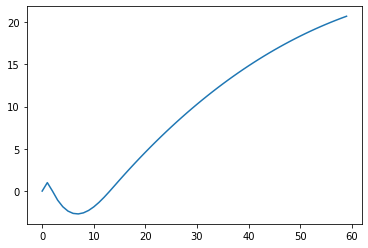

In [112]:
# Run this code:

plt.plot(x_new, g(x_new))

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](http://b.link/binomial55)

* In the cell below, compute the probability that a dice lands on 5 exactly 3 times in 8 tries.


In [ ]:
# Your code here:



* Do a simulation for the last event: do a function that simulate 8 tries and return a 1 if the result is 5 exactly 3 times and 0 if not. Now launch your simulation.

In [ ]:
# Your code here:


* Launch 10 simulations and represent the result in a bar plot. Now launch 1000 simulations and represent it. What do you see?

In [ ]:
# Your code here:
